# Problem Statement

There are thousands of airplanes flying over the North-Atlantic every day and providing internet access to all the passengers onboard can very difficult task. In order to provide Internet access to passengers onboard, we will need to find an optimal data packet routing path to ground station for each plane.Routing optimization is a crucial aspect of aeronautical networks to ensure efficient and reliable communication between aircraft and ground-based systems. There are several factors to consider when optimizing routing in real-world aeronautical networks.

To achieve routing optimization in real-world aeronautical networks, sophisticated algorithms and network management systems are employed. These systems leverage real-time data, predictive analytics, and optimization techniques to make informed decisions about routing paths and dynamically adjust them as needed. Continuous monitoring and analysis of network performance are also essential for identifying bottlenecks and optimizing routing on an ongoing basis.



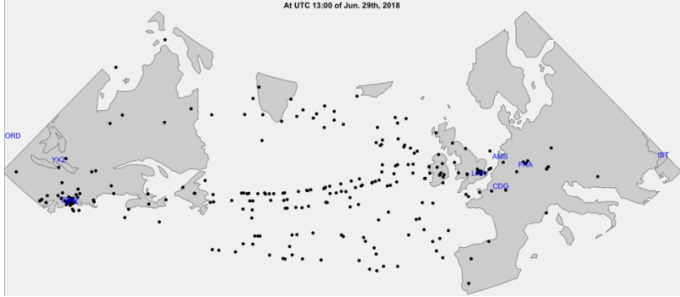

## Optimization Problem 

### Single-objective optimization

Find a routing path having the maximum end-to-end data transmission rate foreach airplane that can access any of a GS, either at Heathrow airport (LHR) (Longitude, Latitude, Altitude) =(51.4700° N, 0.4543° W, 81.73 feet) or Newark Liberty International Airport (EWR) (Longitude, Latitude,Altitude) =(40.6895° N, 74.1745° W, 8.72 feet).

### Multiple-objective optimization

Find a routing path having the maximum end-to-end data transmission rate and minimum end-to-end latency for each airplane that can access any of a GS, either at Heathrow airport (Longitude,Latitude, Altitude) = (51.4700° N, 0.4543° W, 81.73 feet) or Newark Liberty International Airport (Longitude,Latitude, Altitude) = (40.6895° N, 74.1745° W, 8.72 feet).

# Methodology

### Reading the given dataset

In [34]:
import pandas as pd
import math
import numpy as np
data_set=pd.read_csv("E:/SEM 5/Computer networks/Project/NA_11_Jun_29_2018_UTC11.CSV")
print(data_set)

    Flight No   TimeStamp   Altitude   Latitude  Longitude
0       AA101  1530270000  11.879580  53.936440 -14.502541
1       AA151  1530270000  10.965180  49.129004  -4.044335
2       AA198  1530270000   0.000000  39.792819 -72.778591
3       AA204  1530270000   0.000000  40.222121 -73.325611
4       AA209  1530270000  11.574780  60.809745 -29.756008
..        ...         ...        ...        ...        ...
144     UA963  1530270000   9.753600  53.959758 -22.201168
145     UA971  1530270000  10.363200  53.397706  -2.947119
146     UA973  1530270000  10.362076  55.451382  -8.613339
147     UA975  1530270000   9.753600  49.448514  -3.242188
148     UA986  1530270000  10.358980  52.085831  -4.653686

[149 rows x 5 columns]


### Adding the groundstations to the dataset

In [35]:
new_row = {'Flight No': "LHR", 'TimeStamp': 1530270000, 'Altitude': 0.0286, 'Latitude': 51.47, 'Longitude': -0.45}
new_df = pd.DataFrame([new_row])
data_set = pd.concat([data_set,new_df], ignore_index=True)
new_row = {'Flight No': "EWR", 'TimeStamp': 1530270000, 'Altitude': 0.003, 'Latitude': 40.6895, 'Longitude': -74.1745}
new_df = pd.DataFrame([new_row])
data_set = pd.concat([data_set,new_df], ignore_index=True)
print(data_set)

    Flight No   TimeStamp   Altitude   Latitude  Longitude
0       AA101  1530270000  11.879580  53.936440 -14.502541
1       AA151  1530270000  10.965180  49.129004  -4.044335
2       AA198  1530270000   0.000000  39.792819 -72.778591
3       AA204  1530270000   0.000000  40.222121 -73.325611
4       AA209  1530270000  11.574780  60.809745 -29.756008
..        ...         ...        ...        ...        ...
146     UA973  1530270000  10.362076  55.451382  -8.613339
147     UA975  1530270000   9.753600  49.448514  -3.242188
148     UA986  1530270000  10.358980  52.085831  -4.653686
149       LHR  1530270000   0.028600  51.470000  -0.450000
150       EWR  1530270000   0.003000  40.689500 -74.174500

[151 rows x 5 columns]


### An array for node names

In [36]:
length_of_dataset=len(data_set)
name = np.empty(length_of_dataset, dtype=object)
for i in range(length_of_dataset):
    name[i]=data_set.iloc[i][0]
print(name)

['AA101' 'AA151' 'AA198' 'AA204' 'AA209' 'AA221' 'AA25' 'AA258' 'AA291'
 'AA37' 'AA45' 'AA47' 'AA51' 'AA57' 'AA67' 'AA705' 'AA71' 'AA717' 'AA723'
 'AA725' 'AA731' 'AA749' 'AA751' 'AA755' 'AA786' 'AA787' 'AA96' 'AA99'
 'BA117' 'BA173' 'BA174' 'BA175' 'BA177' 'BA179' 'BA185' 'BA191' 'BA2037'
 'BA207' 'BA212' 'BA2167' 'BA217' 'BA239' 'BA244' 'BA249' 'BA250' 'BA251'
 'BA283' 'BA285' 'BA287' 'BA295' 'BA49' 'BA53' 'DL107' 'DL109' 'DL117'
 'DL118' 'DL131' 'DL133' 'DL136' 'DL141' 'DL143' 'DL154' 'DL161' 'DL17'
 'DL177' 'DL179' 'DL195' 'DL209' 'DL210' 'DL229' 'DL23' 'DL231' 'DL246'
 'DL259' 'DL270' 'DL31' 'DL35' 'DL4' 'DL400' 'DL404' 'DL405' 'DL407'
 'DL418' 'DL419' 'DL422' 'DL43' 'DL47' 'DL478' 'DL49' 'DL51' 'DL54' 'DL59'
 'DL63' 'DL71' 'DL73' 'DL81' 'DL83' 'DL87' 'DL91' 'DL97' 'LH400' 'LH416'
 'LH421' 'LH423' 'LH438' 'LH440' 'LH442' 'LH444' 'LH454' 'LH456' 'LH462'
 'LH475' 'LH490' 'LH501' 'LH519' 'LH8164' 'LH8175' 'LH8189' 'LH8250'
 'UA119' 'UA121' 'UA123' 'UA135' 'UA141' 'UA15' 'UA160' 'UA16

### Haversine Coordinate Conversion 

The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes. Important in navigation, it is a special case of a more general formula in spherical trigonometry, the law of haversines, that relates the sides and angles of spherical triangles. 

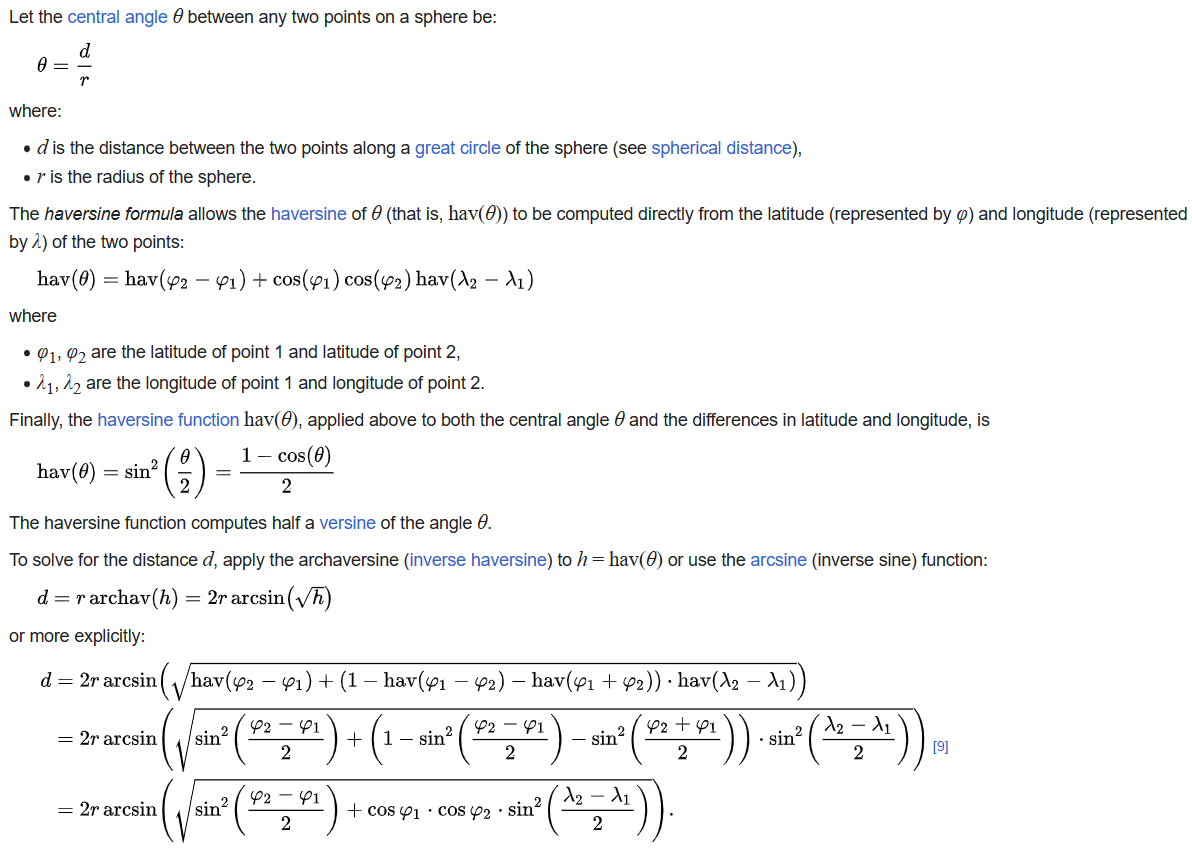

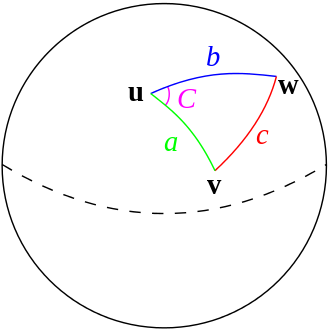

### Conversion of coordinates (Haversine formula) 

Here we are calculating the distance between two nodes using the haversine formula. The double for loop that we used is calculating the distance between every two nodes.

In [37]:
def hvs(lng1, lt1, lng2, lt2):
    lng1, lt1, lng2, lt2 = map(math.radians, [lng1, lt1, lng2, lt2])
    dlon = lng2 - lng1 
    dlat = lt2 - lt1 
    temp = math.sin(dlat/2)**2 + math.cos(lt1) * math.cos(lt2) * math.sin(dlon/2)**2
    sqtemp = 2 * math.asin(math.sqrt(temp)) 
    radius = 6371 
    return sqtemp * radius
rows = length_of_dataset
cols = length_of_dataset
arr = np.zeros((rows, cols))
for i in range(length_of_dataset):
    for j in range (length_of_dataset
):
        
        lt1=data_set.iloc[i][3]
        lng1=data_set.iloc[i][4]
        lt2=data_set.iloc[j][3]
        lng2=data_set.iloc[j][4]
        arr[i][j]=hvs(lng1, lt1, lng2, lt2)
print(arr)

[[   0.          898.00376155 4554.15547885 ...  689.62220568
   983.87190122 4581.22278802]
 [ 898.00376155    0.         5361.36326246 ...  331.58082909
   364.52253081 5401.26763848]
 [4554.15547885 5361.36326246    0.         ... 5236.23783202
  5533.28647145  154.84953248]
 ...
 [ 689.62220568  331.58082909 5236.23783202 ...    0.
   297.15289734 5266.39634865]
 [ 983.87190122  364.52253081 5533.28647145 ...  297.15289734
     0.         5563.04421769]
 [4581.22278802 5401.26763848  154.84953248 ... 5266.39634865
  5563.04421769    0.        ]]


### Transmission Table 

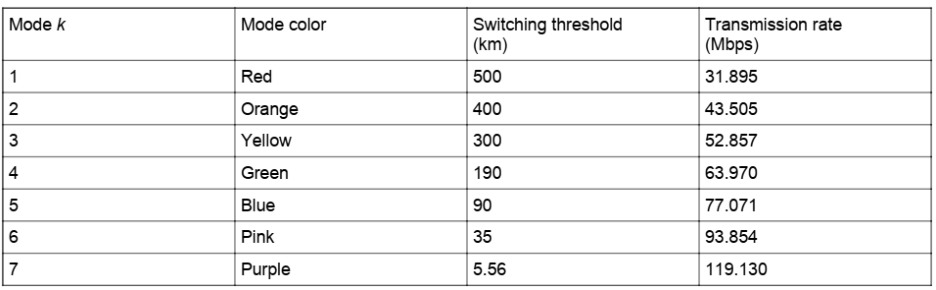

## Creating a graph of nodes

Here we are creating a graph with aeroplanes as nodes and distance between them as edge weights. The distance matrix that we created above is used for this task.

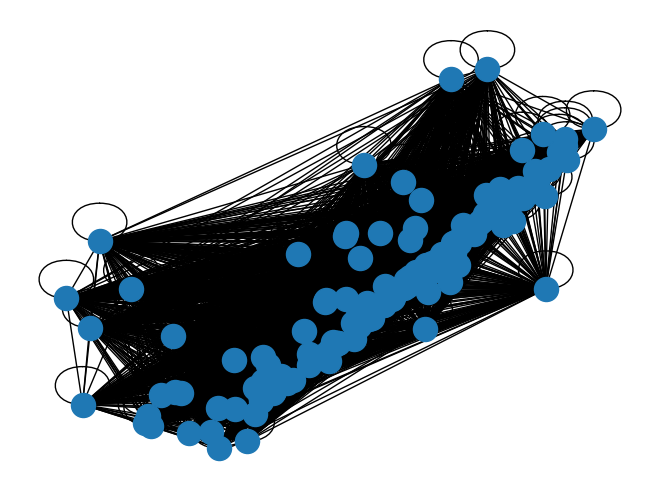

In [38]:
import networkx as nx
import matplotlib.pyplot as plt
gra = nx.Graph()
for i in range (length_of_dataset):
    for j in range (length_of_dataset):
        gra.add_edge(name[i], name[j], weight=arr[i][j])

#Printing the graph
nx.draw(gra)
plt.show()

# Finding the shortest path
We are using a library networkx to find the shortest path. The code written gives the shortest path according to dijktra's algorithm based on distance. The distance matrix that we created above are used as weight for nodes between two graphs. The optimal distance that we found is now checked to find the transmiision rate. 

The algorithm that we used automatically sorts the path based on minimum latency.

In [39]:
for i in range(length_of_dataset):
    path1 = nx.single_source_dijkstra(gra, source='LHR', target=name[i])
    path2 = nx.single_source_dijkstra(gra, source='EWR', target=name[i])
    if(path1[0]<path2[0]):
        mylist=list(path1)
        if(mylist[0]>=500):
            mylist[0]=31.89
        elif(mylist[0]>=400):
            mylist[0]=43.505
        elif(mylist[0]>=300):
            mylist[0]=52.857
        elif(mylist[0]>=190):
            mylist[0]=63.970
        elif(mylist[0]>=90):
            mylist[0]=77.071
        elif(mylist[0]>=35):
            mylist[0]=93.854
        else:
            mylist[0]=119.130
        path1=tuple(mylist)
        print(path1)
        
    else:
        mylist=list(path2)
        if(mylist[0]>=500):
            mylist[0]=31.89
        elif(mylist[0]>=400):
            mylist[0]=43.505
        elif(mylist[0]>=300):
            mylist[0]=52.857
        elif(mylist[0]>=190):
            mylist[0]=63.970
        elif(mylist[0]>=90):
            mylist[0]=77.071
        elif(mylist[0]>=35):
            mylist[0]=93.854
        else:
            mylist[0]=119.130
        path2=tuple(mylist)
        print(path2)

(31.89, ['LHR', 'AA101'])
(52.857, ['LHR', 'AA151'])
(77.071, ['EWR', 'AA198'])
(93.854, ['EWR', 'AA204'])
(31.89, ['LHR', 'AA209'])
(31.89, ['LHR', 'AA221'])
(31.89, ['LHR', 'AA25'])
(31.89, ['LHR', 'AA258'])
(31.89, ['LHR', 'AA291'])
(31.89, ['LHR', 'AA37'])
(31.89, ['LHR', 'AA45'])
(31.89, ['LHR', 'AA47'])
(31.89, ['LHR', 'AA51'])
(31.89, ['LHR', 'AA57'])
(31.89, ['LHR', 'AA67'])
(31.89, ['LHR', 'AA705'])
(31.89, ['LHR', 'AA71'])
(31.89, ['LHR', 'AA717'])
(31.89, ['LHR', 'AA723'])
(31.89, ['LHR', 'AA725'])
(119.13, ['LHR', 'AA731'])
(31.89, ['LHR', 'AA749'])
(43.505, ['LHR', 'AA751'])
(31.89, ['LHR', 'AA755'])
(31.89, ['EWR', 'AA786'])
(52.857, ['LHR', 'AA787'])
(93.854, ['EWR', 'AA96'])
(31.89, ['EWR', 'AA99'])
(31.89, ['LHR', 'BA117'])
(63.97, ['LHR', 'BA173'])
(93.854, ['EWR', 'BA174'])
(31.89, ['LHR', 'BA175'])
(119.13, ['LHR', 'BA177'])
(119.13, ['LHR', 'BA179'])
(31.89, ['LHR', 'BA185'])
(119.13, ['LHR', 'BA191'])
(93.854, ['LHR', 'BA2037'])
(31.89, ['LHR', 'BA207'])
(31.89, [

## The above code but now we take input from user

Now the user will input the node number for which he has to find the path. Thenode number should be between 1-149. The code gives the shortest path based on maximum transmission rate and minimum latency.

In [41]:
i=int(input("Enter the node number "))
path1 = nx.single_source_dijkstra(gra, source='LHR', target=name[i])
path2 = nx.single_source_dijkstra(gra, source='EWR', target=name[i])
if(path1[0]<path2[0]):
    mylist=list(path1)
    if(mylist[0]>=500):
        mylist[0]=31.89
    elif(mylist[0]>=400):
        mylist[0]=43.505
    elif(mylist[0]>=300):
        mylist[0]=52.857
    elif(mylist[0]>=190):
        mylist[0]=63.970
    elif(mylist[0]>=90):
        mylist[0]=77.071
    elif(mylist[0]>=35):
        mylist[0]=93.854
    else:
        mylist[0]=119.130
    path1=tuple(mylist)
    print(path1)

else:
    mylist=list(path2)
    if(mylist[0]>=500):
        mylist[0]=31.89
    elif(mylist[0]>=400):
        mylist[0]=43.505
    elif(mylist[0]>=300):
        mylist[0]=52.857
    elif(mylist[0]>=190):
        mylist[0]=63.970
    elif(mylist[0]>=90):
        mylist[0]=77.071
    elif(mylist[0]>=35):
        mylist[0]=93.854
    else:
        mylist[0]=119.130
    path2=tuple(mylist)
    print(path2)

(31.89, ['LHR', 'AA25'])


### Our Team

Arnav Agarwal 21BLC1100

Ritanshu R Khobarkhede 21BLC1327

Prasann Jain 21BLC1384

Special thanks to sir Dr. Markkandan for giving us the opportunity to solve this challenging problem. He had a great time solving this problem and it really tested out our potential in python coding.